In [ ]:
import pandas as pd
import numpy as np
#%matplotlib ipympl
import matplotlib.pyplot as plt
import time
import pickle
import datetime
import datetime as dt
import io
from sklearn.model_selection import train_test_split, cross_val_predict, KFold

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Full_Dataset.csv to Full_Dataset.csv
Saving belpex_2011.csv to belpex_2011.csv


In [ ]:
start_date = dt.datetime(2021,1,1)
end_date = dt.datetime(2025,3,25)

In [ ]:
df_all = pd.read_csv(io.BytesIO(uploaded['Full_Dataset.csv']), header=0)
df_all.head()

,Date,Price_BE,Load_FR,Gen_FR,Price_CH,Wind_BE,Solar_BE,Load_BE
0,01/01/2021 00:00,48.19,64600,62414.0,45.94,484,0,8571.50
1,01/01/2021 01:00,44.68,63700,60612.0,44.53,675,0,8161.00
2,01/01/2021 02:00,42.92,60600,58978.0,41.01,420,0,7827.00
3,01/01/2021 03:00,40.39,58150,58520.0,39.23,407,0,7628.75
4,01/01/2021 04:00,40.20,57450,57900.0,38.43,529,0,7594.25


In [ ]:
df_all.rename(columns={df_all.columns[0]: 'time'}, inplace=True)
df_all['time'] = pd.to_datetime(df_all['time'], dayfirst=True)
df_all.set_index('time', inplace=True)

In [ ]:
df_all.head()

,Price_BE,Load_FR,Gen_FR,Price_CH,Wind_BE,Solar_BE,Load_BE
time,,,,,,,
2021-01-01 00:00:00,48.19,64600,62414.0,45.94,484,0,8571.50
2021-01-01 01:00:00,44.68,63700,60612.0,44.53,675,0,8161.00
2021-01-01 02:00:00,42.92,60600,58978.0,41.01,420,0,7827.00
2021-01-01 03:00:00,40.39,58150,58520.0,39.23,407,0,7628.75
2021-01-01 04:00:00,40.20,57450,57900.0,38.43,529,0,7594.25


For now, we're interested in the Solar Generation Forecast BE(Solar_BE).

In [ ]:
df_belpex = df_all.Price_BE
df_belpex.head()

,Price_BE
time,
2021-01-01 00:00:00,48.19
2021-01-01 01:00:00,44.68
2021-01-01 02:00:00,42.92
2021-01-01 03:00:00,40.39
2021-01-01 04:00:00,40.20


In [ ]:
df_load_FR = df_all.Load_FR
df_load_FR.head()

,Load_FR
time,
2021-01-01 00:00:00,64600
2021-01-01 01:00:00,63700
2021-01-01 02:00:00,60600
2021-01-01 03:00:00,58150
2021-01-01 04:00:00,57450


In [ ]:
df_Gen_FR = df_all.Gen_FR
df_Gen_FR.head()

,Gen_FR
time,
2021-01-01 00:00:00,62414.0
2021-01-01 01:00:00,60612.0
2021-01-01 02:00:00,58978.0
2021-01-01 03:00:00,58520.0
2021-01-01 04:00:00,57900.0


In [ ]:
df_Price_CH = df_all.Price_CH
df_Price_CH.head()

,Price_CH
time,
2021-01-01 00:00:00,45.94
2021-01-01 01:00:00,44.53
2021-01-01 02:00:00,41.01
2021-01-01 03:00:00,39.23
2021-01-01 04:00:00,38.43


In [ ]:
df_solar = df_all.Solar_BE
df_solar.head()

,Solar_BE
time,
2021-01-01 00:00:00,0
2021-01-01 01:00:00,0
2021-01-01 02:00:00,0
2021-01-01 03:00:00,0
2021-01-01 04:00:00,0


We're also interested in the Wind Generation Forecast BE(Wind_BE)

In [ ]:
df_wind = df_all.Wind_BE
df_wind.head()

,Wind_BE
time,
2021-01-01 00:00:00,484
2021-01-01 01:00:00,675
2021-01-01 02:00:00,420
2021-01-01 03:00:00,407
2021-01-01 04:00:00,529


In [ ]:
df_load_BE = df_all.Load_BE
df_load_BE.head()

,Load_BE
time,
2021-01-01 00:00:00,8571.50
2021-01-01 01:00:00,8161.00
2021-01-01 02:00:00,7827.00
2021-01-01 03:00:00,7628.75
2021-01-01 04:00:00,7594.25


We're also interested in the Day-Ahead Price BE(Price_BE)

In [ ]:
dates = pd.date_range(start=start_date, end=end_date, freq='1h')
for d in dates:
    try:
        p = df_belpex.loc[d]
    except KeyError:
        print(d)

2021-03-28 02:00:00
2022-01-19 07:00:00
2022-01-19 08:00:00
2022-01-19 09:00:00
2022-01-19 10:00:00
2022-01-19 11:00:00
2022-01-19 12:00:00
2022-01-19 13:00:00
2022-01-19 14:00:00
2022-01-19 15:00:00
2022-01-19 16:00:00
2022-01-19 17:00:00
2022-01-19 18:00:00
2022-01-19 19:00:00
2022-01-19 20:00:00
2022-01-19 21:00:00
2022-01-19 22:00:00
2022-03-27 02:00:00
2023-03-26 02:00:00
2023-07-09 08:00:00
2023-07-09 09:00:00
2023-07-09 10:00:00
2023-07-09 11:00:00
2023-07-09 12:00:00
2023-07-09 13:00:00
2023-07-09 14:00:00
2023-07-09 15:00:00
2023-07-09 16:00:00
2024-03-31 02:00:00
2024-08-03 06:00:00
2024-08-03 07:00:00
2024-08-03 08:00:00
2024-08-03 09:00:00
2024-09-12 22:00:00
2024-09-12 23:00:00
2024-09-13 00:00:00
2024-09-13 01:00:00


We will have to take assumptions of these values. In this case it makes sense to either assume they are the same as the previous hour or the next hour. Or, to take the average of both. In this case we will just assume the price is the same as the previous hour.

In [ ]:
dates = pd.date_range(start=start_date, end=end_date, freq='1h')
for d in dates:
    try:
        p1 = df_belpex.loc[d]
        p2 = df_load_FR.loc[d]
        p3 = df_Gen_FR.loc[d]
        p4 = df_Price_CH.loc[d]
        p5 = df_solar.loc[d]
        p6 = df_wind.loc[d]
        p7 = df_load_BE.loc[d]
    except KeyError:
        df_belpex.loc[d] = df_belpex.loc[d-dt.timedelta(hours=1)]
        df_load_FR.loc[d] = df_load_FR.loc[d-dt.timedelta(hours=1)]
        df_Gen_FR.loc[d] = df_Gen_FR.loc[d-dt.timedelta(hours=1)]
        df_Price_CH.loc[d] = df_Price_CH.loc[d-dt.timedelta(hours=1)]
        df_solar.loc[d] = df_solar.loc[d-dt.timedelta(hours=1)]
        df_wind.loc[d] = df_wind.loc[d-dt.timedelta(hours=1)]
        df_load_BE.loc[d] = df_load_BE.loc[d-dt.timedelta(hours=1)]


df_belpex = df_belpex.sort_index()
df_belpex = df_belpex[start_date:end_date]

df_load_FR = df_load_FR.sort_index()
df_load_FR = df_load_FR[start_date:end_date]

df_Gen_FR = df_Gen_FR.sort_index()
df_Gen_FR = df_Gen_FR[start_date:end_date]

df_Price_CH = df_Price_CH.sort_index()
df_Price_CH = df_Price_CH[start_date:end_date]

df_solar = df_solar.sort_index()
df_solar = df_solar[start_date:end_date]

df_wind = df_wind.sort_index()
df_wind = df_wind[start_date:end_date]

df_load_BE = df_load_BE.sort_index()
df_load_BE = df_load_BE[start_date:end_date]

In [ ]:
dates = pd.date_range(start=start_date, end=end_date, freq='1h')
for d in dates:
    try:
        p = df_belpex.loc[d]
    except KeyError:
        print(d)

In [ ]:
df_belpex =  df_belpex.fillna(method='pad')
df_load_FR =  df_load_FR.fillna(method='pad')
df_Gen_FR =  df_Gen_FR.fillna(method='pad')
df_Price_CH =  df_Price_CH.fillna(method='pad')
df_solar =  df_solar.fillna(method='pad')
df_wind =  df_wind.fillna(method='pad')
df_load_BE =  df_load_BE.fillna(method='pad')

<ipython-input-18-9a318dfd7c6b>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_belpex =  df_belpex.fillna(method='pad')
<ipython-input-18-9a318dfd7c6b>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_load_FR =  df_load_FR.fillna(method='pad')
<ipython-input-18-9a318dfd7c6b>:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_Gen_FR =  df_Gen_FR.fillna(method='pad')
<ipython-input-18-9a318dfd7c6b>:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_Price_CH =  df_Price_CH.fillna(method='pad')
<ipython-input-18-9a318dfd7c6b>:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ff

In [ ]:
#############Handling Time Granularity Differences in Datasets#################
d = {'belpex': df_belpex.values,'LF':df_load_FR.values,'GF': df_Gen_FR.values,'PCH':df_Price_CH.values, 'solar': df_solar.values, 'wind': df_wind.values,'LBE': df_load_BE.values}
data = pd.DataFrame(index=df_belpex.index, data=d)
data.head()

,belpex,LF,GF,PCH,solar,wind,LBE
time,,,,,,,
2021-01-01 00:00:00,48.19,64600,62414.0,45.94,0,484,8571.50
2021-01-01 01:00:00,44.68,63700,60612.0,44.53,0,675,8161.00
2021-01-01 02:00:00,42.92,60600,58978.0,41.01,0,420,7827.00
2021-01-01 03:00:00,40.39,58150,58520.0,39.23,0,407,7628.75
2021-01-01 04:00:00,40.20,57450,57900.0,38.43,0,529,7594.25


# 1. Visualize the data

In [ ]:
print(data.head(10))
print(data.tail(10))

                     belpex     LF       GF    PCH  solar  wind      LBE
time                                                                    
2021-01-01 00:00:00   48.19  64600  62414.0  45.94      0   484  8571.50
2021-01-01 01:00:00   44.68  63700  60612.0  44.53      0   675  8161.00
2021-01-01 02:00:00   42.92  60600  58978.0  41.01      0   420  7827.00
2021-01-01 03:00:00   40.39  58150  58520.0  39.23      0   407  7628.75
2021-01-01 04:00:00   40.20  57450  57900.0  38.43      0   529  7594.25
2021-01-01 05:00:00   39.63  57700  58011.0  39.57      0   317  7650.50
2021-01-01 06:00:00   40.09  58050  58683.0  40.78      0   349  7554.50
2021-01-01 07:00:00   41.27  58600  58912.0  42.72      2   293  7595.75
2021-01-01 08:00:00   44.88  59300  60032.0  44.32    102   217  7783.25
2021-01-01 09:00:00   45.00  61700  61424.0  46.14    314   323  8101.75
                     belpex     LF       GF     PCH  solar  wind       LBE
time                                             

Create a plot of the different collums using matplotlib.

Plotting with matplotlib.pyplot is very similar to plotting in matlab. Some key commands:
* <b>plt.figure()</b>: creates a new, blank figure. This changes the current graph and axis to the newly created ones. All commands applied hereafter will be applied to the new, current figure.
* <b>plt.show()</b>: show the figure. If you don't execute this command, no figure will show.
* For more commands, see http://matplotlib.org/users/pyplot_tutorial.html

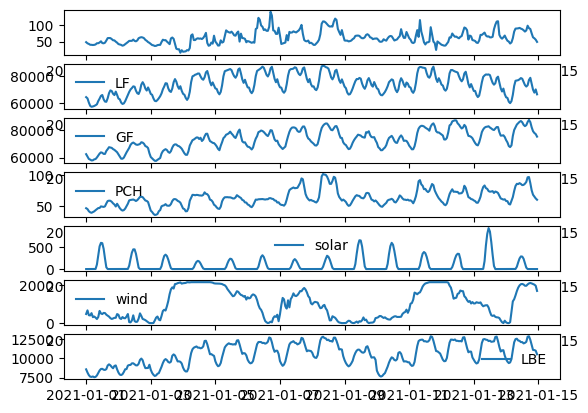

In [ ]:
#plot##
start = datetime.datetime(2021, 1, 1, 0, 0)
end = datetime.datetime(2021, 1, 14, 23, 45)

plt.figure()
plt.subplot(711)
plt.plot(data.belpex[start:end], label='belpex')
plt.subplot(712)
plt.plot(data.LF[start:end], label='LF')
plt.legend(frameon=False)
plt.subplot(713)
plt.plot(data.GF[start:end], label='GF')
plt.legend(frameon=False)
plt.subplot(714)
plt.plot(data.PCH[start:end], label='PCH')
plt.legend(frameon=False)
plt.subplot(715)
plt.plot(data.solar[start:end], label='solar')
plt.legend(frameon=False)
plt.subplot(716)
plt.plot(data.wind[start:end], label='wind')
plt.legend(frameon=False)
plt.subplot(717)
plt.plot(data.LBE[start:end], label='LBE')
plt.legend(frameon=False)
plt.show()

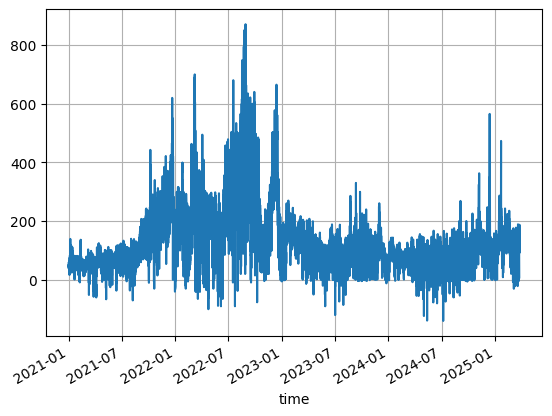

In [ ]:
plt.figure()
data.belpex.plot(grid=True)
plt.show()

# 2. Clean the data by removing outliers

In [ ]:
mean = data.belpex.mean()
std = data.belpex.std()
n_std = 5
data['belpex'][(data.belpex >= mean + n_std*std)] = mean + n_std*std
data['belpex'][(data.belpex <= mean - n_std*std)] = mean + n_std*std

<ipython-input-23-d63c1dcf8f78>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['belpex'][(data.belpex >= mean + n_std*std)] = mean + n_std*std
<ipython-input-23-d63c1dcf8f78>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['belpex'][(data.belpex <= mean - n_std*std)] = mean + n_std*std


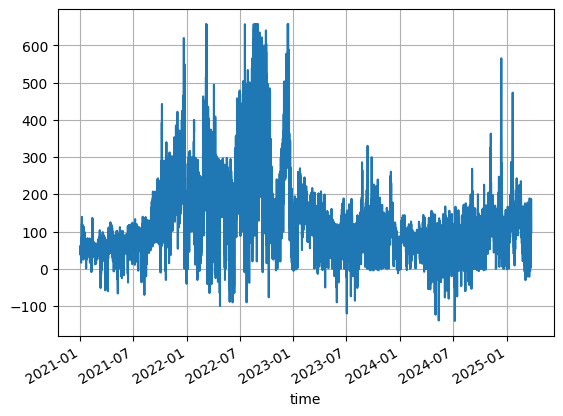

In [ ]:
plt.figure()
data.belpex.plot(grid=True)
plt.show()

Autocorrelation
To check if past prices can help predict future prices. If yes (values close to 1), then your neural network can use this pattern to make better forecasts.

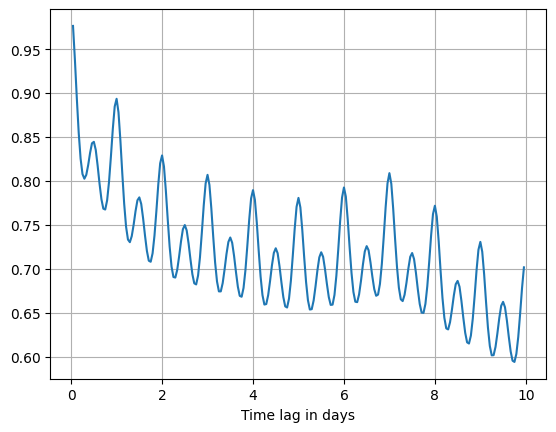

In [ ]:
# Autocorrelation
lags = np.arange(1, 24*1*10)
acors = []
for lag in lags:
    acors.append(data.belpex.autocorr(lag))
plt.figure()
plt.plot(lags/1/24.0, acors)
plt.xlabel('Time lag in days')
plt.grid(True)

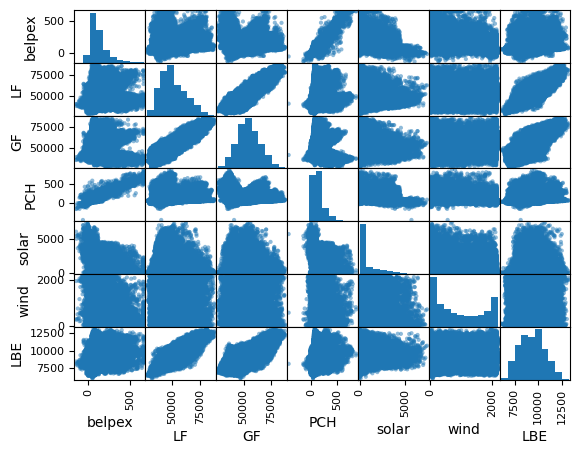

In [ ]:
import pandas as pd
a = pd.plotting.scatter_matrix(data[['belpex', 'LF', 'GF', 'PCH', 'solar', 'wind', 'LBE']])

# 7. Neural network (a naive implementation)

In [ ]:
def get_accuracy(x, y):
    return np.mean(np.abs(x - y))/np.mean(x)


* Create test and validation set
    * https://en.wikipedia.org/wiki/Test_set
    * http://stats.stackexchange.com/questions/19048/what-is-the-difference-between-test-set-and-validation-set
* Add additional features
    * same day of the previous week (see autocorrelation plot)
    * use a wind and solar forecast as an additional feature (assume you can make perfect forecasts)
    * Use EliaTotalLoad from datafetcher
    * Are there other features that have an influence on the price and thus may affect prediction performance
* Tune the structure of the neural network (use grid search)
    * number of layers
        * http://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw
    * different activation functions
        * https://en.wikipedia.org/wiki/Activation_function

Advice: read the documentation on https://keras.io/ for help

In [ ]:
from sklearn.preprocessing import StandardScaler # StandardScaler is used to normalize features by removing the mean
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit # A cross-validator for time series data. It ensures that training folds always occur before validation folds.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop

def build_model(input_dim, forecast_horizon):
    model = Sequential()

    model.add(Dense(64, input_dim=input_dim, activation='relu')) # Dense layer feeds all the outputs from the previous layer to its neurons

    model.add(Dense(32, activation='linear')) # Why 32 neurons ? Why using linear activation function?

    model.add(Dense(forecast_horizon)) # number of time steps the model is supposed to predict (output layer is 72 neurons, as it needs to predict 72 values of the belpex price)
                                      # default is linear activation function
    model.compile(loss='mean_squared_error', optimizer=RMSprop(learning_rate=0.01))
    return model

def prepare_data(features, forecast_horizon=72, n_hours=24):
    X, Y = [], []
    for i in range(n_hours, len(data) - forecast_horizon): # why are we not considering the past 72 hours?
        feature_values = []
        for f in features:
            feature_values.extend(data[f].values[i - n_hours:i])
        feature_values.extend(data['belpex'].values[i - n_hours:i])  # Always include past belpex
        X.append(feature_values)
        Y.append(data['belpex'].values[i:i + forecast_horizon])
    return np.array(X), np.array(Y)

def cross_validate_model(X, Y, forecast_horizon, n_splits=5):
    tscv = TimeSeriesSplit(n_splits=n_splits)
    train_mse_scores, test_mse_scores = [], []

    for train_idx, test_idx in tscv.split(X):
        X_train, X_test = X[train_idx], X[test_idx]
        Y_train, Y_test = Y[train_idx], Y[test_idx]

        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        model = build_model(X.shape[1], forecast_horizon)
        model.fit(X_train, Y_train, epochs=50, batch_size=32, verbose=0)

        pred_train = model.predict(X_train)
        pred_test = model.predict(X_test)

        train_mse_scores.append(mean_squared_error(Y_train, pred_train))
        test_mse_scores.append(mean_squared_error(Y_test, pred_test))

    return np.mean(train_mse_scores), np.mean(test_mse_scores), model

# Feature combinations
feature_combinations = [
    ['LF'], ['GF'], ['PCH'], ['solar'], ['wind'], ['LBE'],
    ['LF', 'GF'], ['LF', 'PCH'], ['LF', 'solar'], ['LF', 'wind'], ['LF', 'LBE'],
    ['LF', 'GF', 'PCH', 'solar', 'wind', 'LBE'],
    ['LF', 'GF', 'PCH', 'solar', 'wind', 'LBE', 'belpex']
]

forecast_horizon = 72
results = {}

for features in feature_combinations:
    X, Y = prepare_data(features, forecast_horizon)
    train_mse, test_mse, final_model = cross_validate_model(X, Y, forecast_horizon)
    results[str(features)] = {'Train MSE': train_mse, 'Test MSE': test_mse}

    # Plot for one example from the last test fold
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    pred_example = final_model.predict(X_scaled[-1].reshape(1, -1))
    actual_example = Y[-1]

    plt.figure(figsize=(12, 6))
    plt.plot(actual_example, label='Actual')
    plt.plot(pred_example.flatten(), label='Predicted')
    plt.title(f"Forecast Horizon Prediction (Features: {features})")
    plt.legend()
    plt.grid(True)
    plt.show()

# Print all results
for features, mse in results.items():
    print(f"Features: {features}")
    print(f"Train MSE: {mse['Train MSE']:.4f}, Test MSE: {mse['Test MSE']:.4f}")
    print("-" * 50)

# Forecast for future horizon using the best model
forecast_start = pd.Timestamp('2025-05-12 00:00:00')
forecast_input = []

n_hours = 24
best_features = ['LF', 'GF', 'PCH', 'solar', 'wind', 'LBE', 'belpex']
for f in best_features:
    forecast_input.extend(data[f].values[-n_hours:])

forecast_input = np.array(forecast_input).reshape(1, -1)
scaler = StandardScaler()
forecast_input = scaler.fit_transform(forecast_input)

forecast_72_hours = final_model.predict(forecast_input).flatten()
forecast_df = pd.DataFrame(forecast_72_hours)
forecast_df.to_csv('predictions.csv', index=False, header=False)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
